# Building and Evaluating Machine Learning Models for Predicting Track Popularity using Classification Techniques

### This analysis focuses on developing and evaluating various machine learning models, such as Decision Trees, Random Forest, K-Nearest Neighbors, and SVM, to predict track popularity based on different audio and metadata features. The objective is to implement, tune, and assess models for performance using key metrics like accuracy, precision, recall, and F1-score.

In [54]:
#!pip install missingno

###The imports include libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn, missingno), and handling dates (datetime). Additionally, Scikit-learn modules for preprocessing, building machine learning models (like RandomForestClassifier, SVC, KNeighborsClassifier), and evaluation metrics are imported to streamline ML workflows.

In [55]:
## Importing necessary libraries
import re
import pandas as pd
import numpy as np
import datetime
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


This part of code reads a CSV file into a DataFrame, shuffles the dataset to randomize the order of the rows, and then displays the first 20 rows of the shuffled dataset.

In [56]:
# Define the file paths
file_path = r"/comercial.csv"

# Read the CSV files with the correct separator
data = pd.read_csv(file_path, sep=',', header=0)

# Shuffle the combined dataset
df = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the combined dataset
df.head(20)

,artist,song,hour,date,popularity,album_name,release_date,total_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Gracie Abrams,Close To You,18:46,22/06/2020,85.0,The Secret of Us,2024-06-21,13.0,0.590,0.727,6.0,-7.955,1.0,0.0706,0.02590,0.000065,0.0827,0.356,121.966
1,"Jay Z, Alicia Keys",Empire State of Mind,12:29,05/05/2021,81.0,The Blueprint 3,2009-09-08,15.0,0.491,0.956,11.0,-1.538,1.0,0.3920,0.02950,0.000000,0.4600,0.811,173.585
2,Ivandro,Lua,02:41,13/11/2023,58.0,Trovador,2024-02-16,21.0,0.641,0.395,3.0,-7.708,0.0,0.0512,0.83700,0.000086,0.1190,0.372,151.970
3,Carolina Deslandes,A Vida Toda,05:21,30/08/2024,44.0,Casa,2018-04-20,15.0,0.786,0.294,4.0,-10.006,0.0,0.0440,0.78700,0.000052,0.1040,0.536,128.040
4,Xutos & Pontapés,À Minha Maneira,06:38,28/11/2019,35.0,Grandes Êxitos,2017-09-08,14.0,0.388,0.919,5.0,-4.658,1.0,0.0445,0.00235,0.000036,0.3270,0.795,159.159
5,Kapo,Ohnana,03:33,25/05/2020,88.0,Ohnana,2024-06-06,1.0,0.775,0.581,1.0,-3.621,0.0,0.1080,0.61700,0.000008,0.0957,0.658,104.977
6,Brandi Carlile,The Story,12:49,16/01/2020,63.0,The Story,2007-04-03,13.0,0.544,0.500,11.0,-8.253,1.0,0.0260,0.03250,0.000004,0.1090,0.177,93.621
7,Michael Bublé,Home,00:11,14/12/2023,63.0,It's Time,2005-02-07,13.0,0.608,0.370,7.0,-9.207,1.0,0.0306,0.84400,0.000019,0.1120,0.349,127.631
8,Rag'n'Bone Man,Human,13:10,05/01/2021,80.0,Human (Deluxe),2017-02-10,19.0,0.602,0.707,9.0,-4.097,1.0,0.3020,0.39300,0.000000,0.1650,0.554,75.087
9,"Pedro Abrunhosa, Sara Correia",Que o Amor Te Salve nesta Noite Escura,09:41,02/01/2021,46.0,Que O Amor Te Salve Nesta Noite Escura (Ao Vivo),2022-03-25,1.0,0.465,0.428,0.0,-8.426,1.0,0.0533,0.85400,0.000000,0.7130,0.374,127.221


In [57]:
# Checking which column have null value and calculating the summation of missing values
missing_data_per_column = df.isnull().sum()
print(missing_data_per_column)

artist                  0
song                    0
hour                    0
date                    0
popularity           3680
album_name           3680
release_date         3680
total_track_album    3680
danceability         3680
energy               3680
key                  3680
loudness             3680
mode                 3680
speechiness          3680
acousticness         3680
instrumentalness     3680
liveness             3680
valence              3680
tempo                3680
dtype: int64


It generates visualizations to identify missing data, bar() function shows a bar plot indicating the presence of missing values, while heatmap() visualizes correlations between missing values in the dataset.

<Axes: >

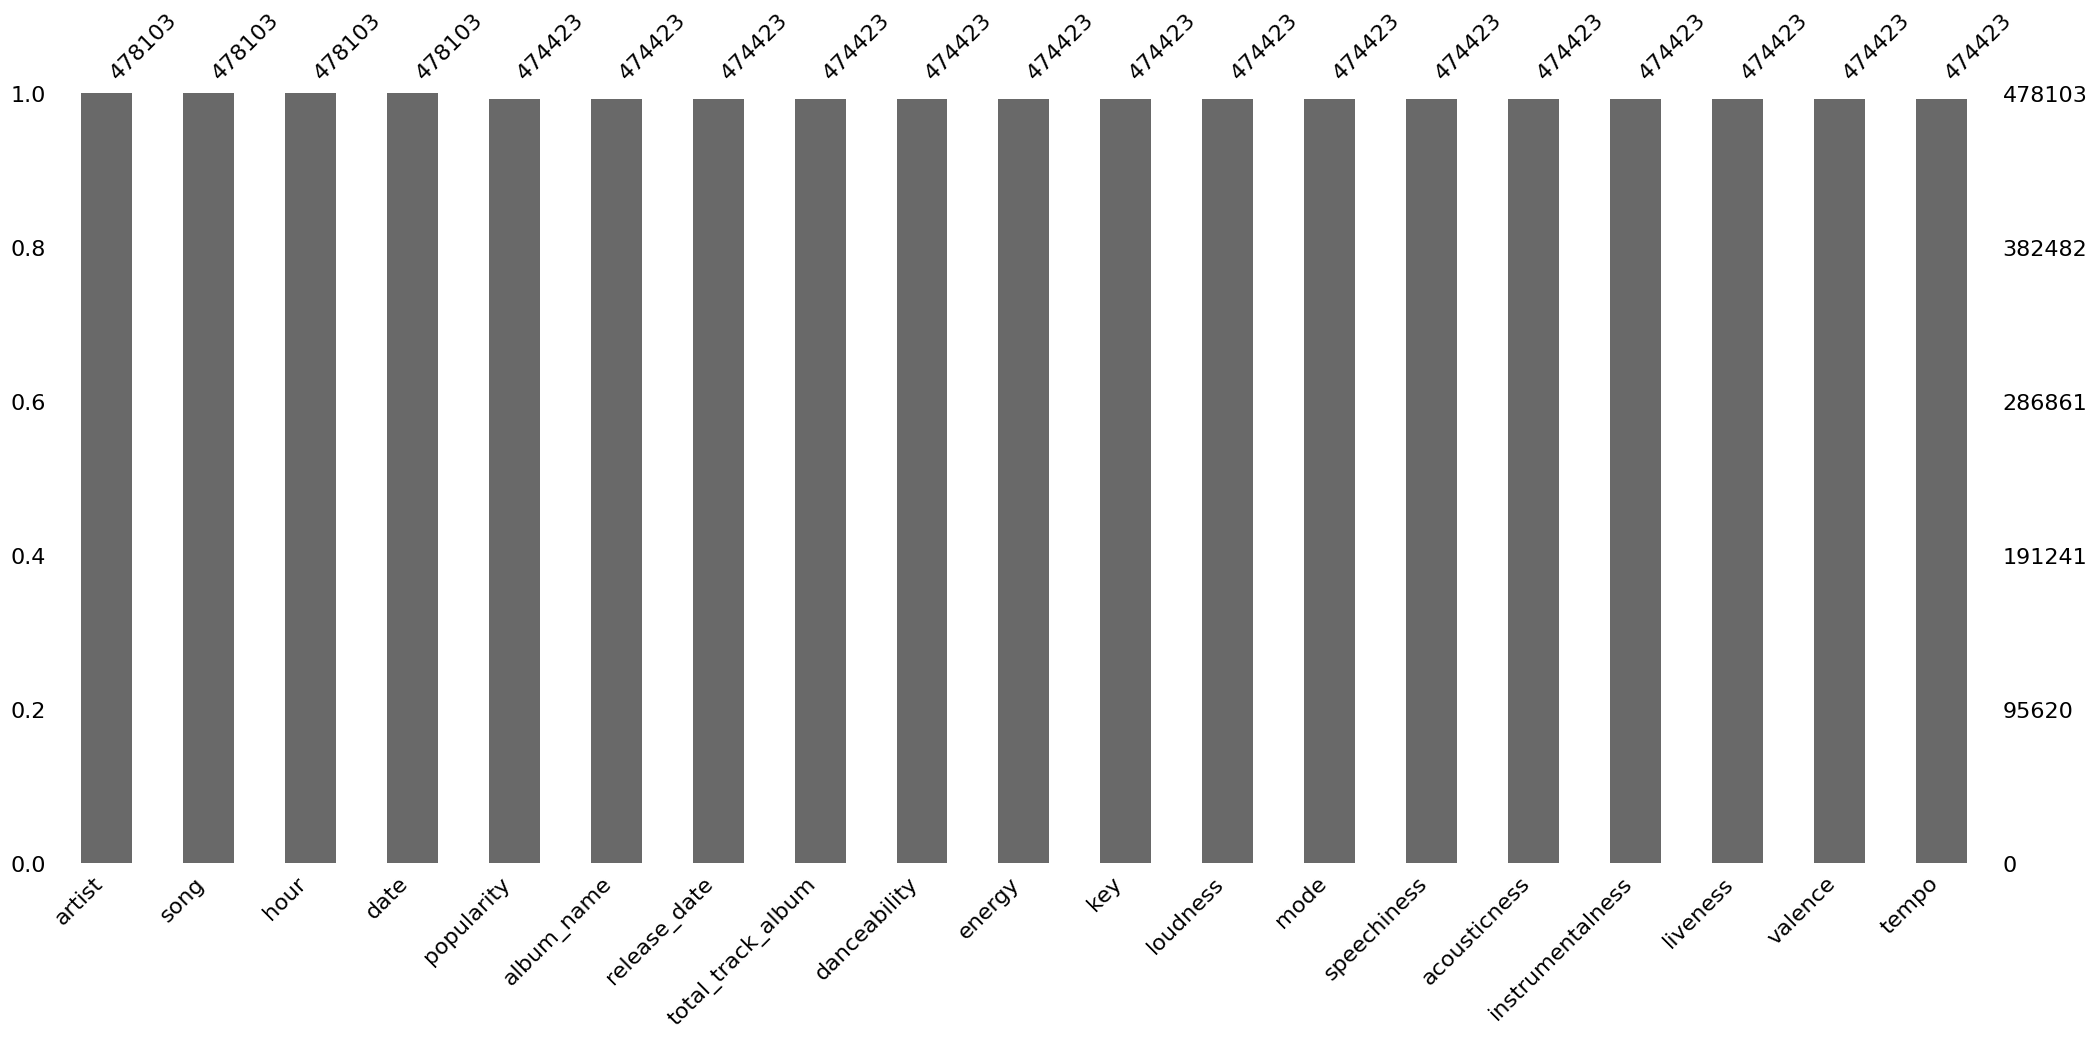

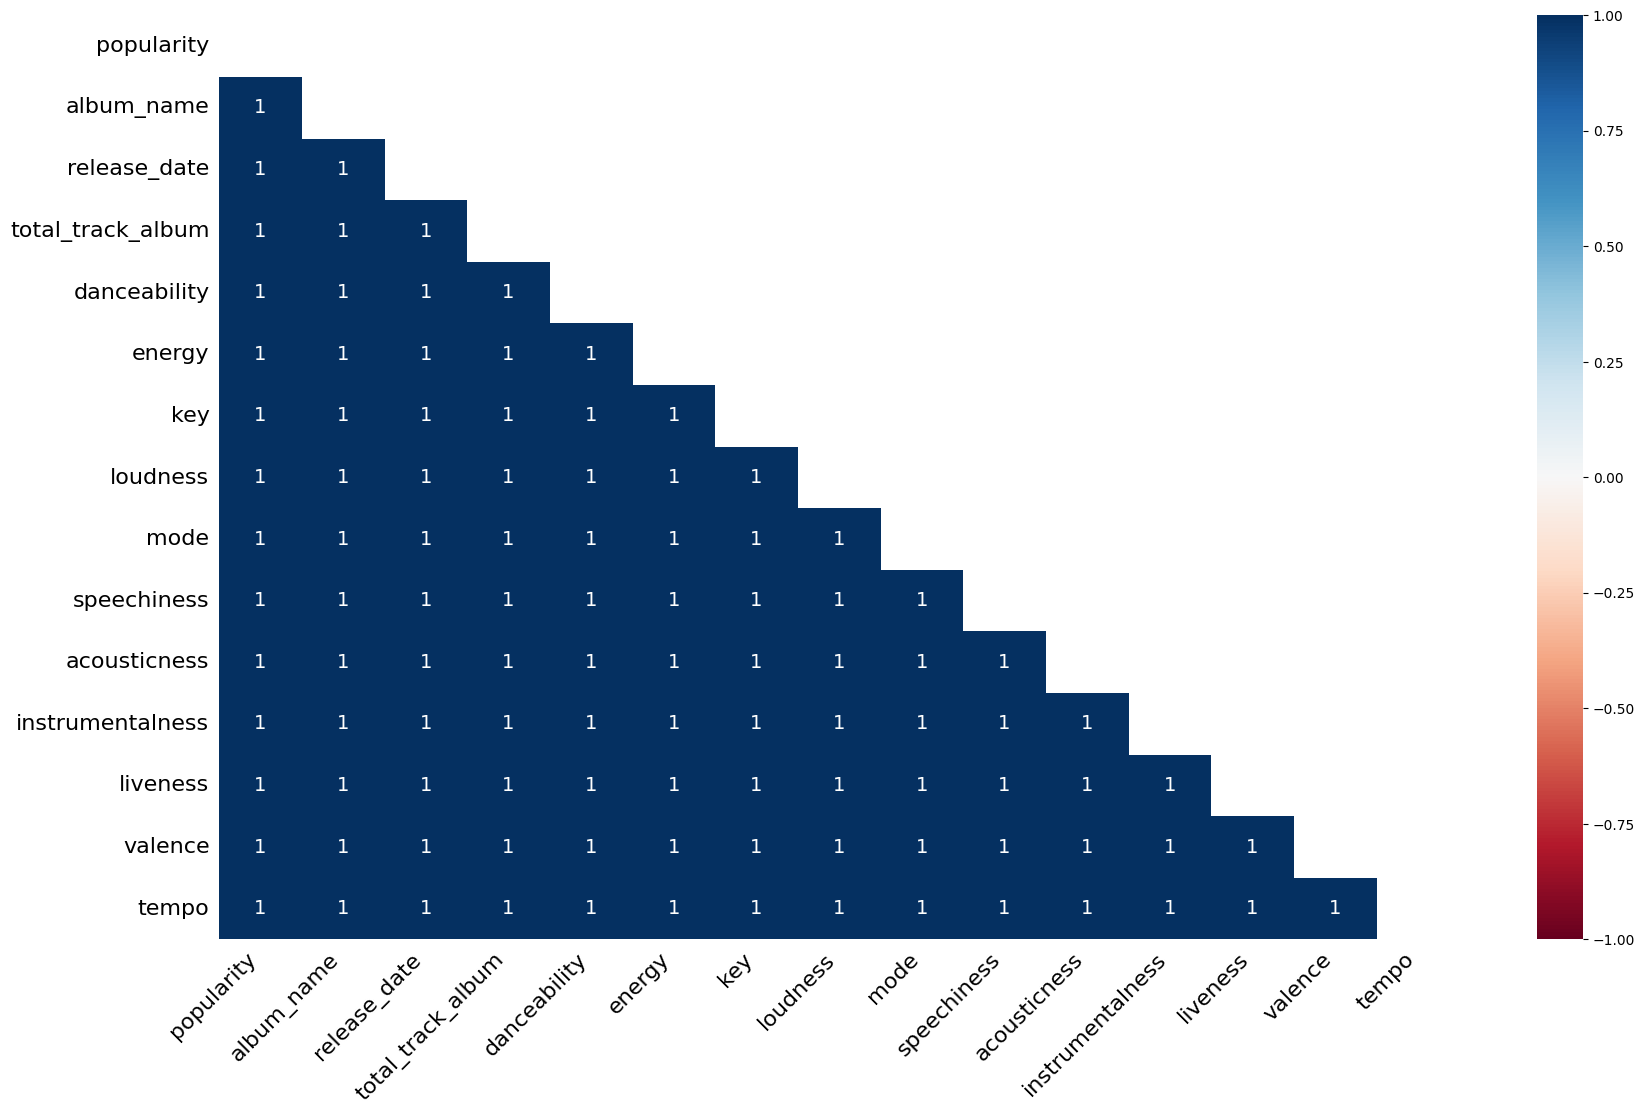

In [58]:
# Visualize missing data using a matrix plot
msno.bar(data)
msno.heatmap(data)

In [59]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape of the cleaned dataset
df_cleaned.shape

(474423, 19)

In [60]:
# Check for any remaining missing values
df_cleaned.isnull().sum()

,0
artist,0
song,0
hour,0
date,0
popularity,0
album_name,0
release_date,0
total_track_album,0
danceability,0
energy,0


In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474423 entries, 0 to 478102
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   artist             474423 non-null  object 
 1   song               474423 non-null  object 
 2   hour               474423 non-null  object 
 3   date               474423 non-null  object 
 4   popularity         474423 non-null  float64
 5   album_name         474423 non-null  object 
 6   release_date       474423 non-null  object 
 7   total_track_album  474423 non-null  float64
 8   danceability       474423 non-null  float64
 9   energy             474423 non-null  float64
 10  key                474423 non-null  float64
 11  loudness           474423 non-null  float64
 12  mode               474423 non-null  float64
 13  speechiness        474423 non-null  float64
 14  acousticness       474423 non-null  float64
 15  instrumentalness   474423 non-null  float64
 16  livenes

This part of code converts the 'hour' column to a proper time format, replacing any invalid times with a missing value, and then displays the first 20 rows to check the result.

In [62]:
# Convert hour to appropriate formats using .loc[] to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'hour'] = pd.to_datetime(df_cleaned['hour'], format='%H:%M', errors='coerce')

# Check the first 20 rows
df_cleaned.head(20)


,artist,song,hour,date,popularity,album_name,release_date,total_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Gracie Abrams,Close To You,1900-01-01 18:46:00,22/06/2020,85.0,The Secret of Us,2024-06-21,13.0,0.590,0.727,6.0,-7.955,1.0,0.0706,0.02590,0.000065,0.0827,0.356,121.966
1,"Jay Z, Alicia Keys",Empire State of Mind,1900-01-01 12:29:00,05/05/2021,81.0,The Blueprint 3,2009-09-08,15.0,0.491,0.956,11.0,-1.538,1.0,0.3920,0.02950,0.000000,0.4600,0.811,173.585
2,Ivandro,Lua,1900-01-01 02:41:00,13/11/2023,58.0,Trovador,2024-02-16,21.0,0.641,0.395,3.0,-7.708,0.0,0.0512,0.83700,0.000086,0.1190,0.372,151.970
3,Carolina Deslandes,A Vida Toda,1900-01-01 05:21:00,30/08/2024,44.0,Casa,2018-04-20,15.0,0.786,0.294,4.0,-10.006,0.0,0.0440,0.78700,0.000052,0.1040,0.536,128.040
4,Xutos & Pontapés,À Minha Maneira,1900-01-01 06:38:00,28/11/2019,35.0,Grandes Êxitos,2017-09-08,14.0,0.388,0.919,5.0,-4.658,1.0,0.0445,0.00235,0.000036,0.3270,0.795,159.159
5,Kapo,Ohnana,1900-01-01 03:33:00,25/05/2020,88.0,Ohnana,2024-06-06,1.0,0.775,0.581,1.0,-3.621,0.0,0.1080,0.61700,0.000008,0.0957,0.658,104.977
6,Brandi Carlile,The Story,1900-01-01 12:49:00,16/01/2020,63.0,The Story,2007-04-03,13.0,0.544,0.500,11.0,-8.253,1.0,0.0260,0.03250,0.000004,0.1090,0.177,93.621
7,Michael Bublé,Home,1900-01-01 00:11:00,14/12/2023,63.0,It's Time,2005-02-07,13.0,0.608,0.370,7.0,-9.207,1.0,0.0306,0.84400,0.000019,0.1120,0.349,127.631
8,Rag'n'Bone Man,Human,1900-01-01 13:10:00,05/01/2021,80.0,Human (Deluxe),2017-02-10,19.0,0.602,0.707,9.0,-4.097,1.0,0.3020,0.39300,0.000000,0.1650,0.554,75.087
9,"Pedro Abrunhosa, Sara Correia",Que o Amor Te Salve nesta Noite Escura,1900-01-01 09:41:00,02/01/2021,46.0,Que O Amor Te Salve Nesta Noite Escura (Ao Vivo),2022-03-25,1.0,0.465,0.428,0.0,-8.426,1.0,0.0533,0.85400,0.000000,0.7130,0.374,127.221


This part of code converts the 'release_date' to a proper date format and transforms the 'hour' column into total minutes. It then does binning with the time into periods of the day (Morning, Afternoon, Evening, Night) based on these minutes and drops the original 'hour' column, showing the first 20 rows for validation

In [63]:
# Convert 'date' and 'release_date' columns to datetime, handle potential parsing issues
# df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d/%m/%Y', errors='coerce')
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Ensure 'hour' column is in minutes (if not already)
df_cleaned['hour'] = pd.to_datetime(df_cleaned['hour'], format='%H:%M', errors='coerce')
df_cleaned['hour'] = df_cleaned['hour'].dt.hour * 60 + df_cleaned['hour'].dt.minute

# Drop rows where 'hour' conversion failed (if there are any NaN values after conversion)
df_cleaned = df_cleaned.dropna(subset=['hour'])

# Define time-based bins (adjust according to radio listenership patterns)
bins = [0, 360, 720, 1080, 1440]  # 0-360 (Morning), 360-720 (Afternoon), 720-1080 (Evening), 1080-1440 (Night)
labels = ['Morning', 'Afternoon', 'Evening', 'Night']

# Create time-based bins for the 'hour' column
df_cleaned['time_of_day'] = pd.cut(df_cleaned['hour'], bins=bins, labels=labels, include_lowest=True)

# Drop 'hour' column
df_cleaned = df_cleaned.drop(columns=['hour'])

df_cleaned.head(20)

<ipython-input-63-098bc463716f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')
<ipython-input-63-098bc463716f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = pd.to_datetime(df_cleaned['hour'], format='%H:%M', errors='coerce')
<ipython-input-63-098bc463716f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,artist,song,date,popularity,album_name,release_date,total_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_of_day
0,Gracie Abrams,Close To You,22/06/2020,85.0,The Secret of Us,2024-06-21,13.0,0.590,0.727,6.0,-7.955,1.0,0.0706,0.02590,0.000065,0.0827,0.356,121.966,Night
1,"Jay Z, Alicia Keys",Empire State of Mind,05/05/2021,81.0,The Blueprint 3,2009-09-08,15.0,0.491,0.956,11.0,-1.538,1.0,0.3920,0.02950,0.000000,0.4600,0.811,173.585,Evening
2,Ivandro,Lua,13/11/2023,58.0,Trovador,2024-02-16,21.0,0.641,0.395,3.0,-7.708,0.0,0.0512,0.83700,0.000086,0.1190,0.372,151.970,Morning
3,Carolina Deslandes,A Vida Toda,30/08/2024,44.0,Casa,2018-04-20,15.0,0.786,0.294,4.0,-10.006,0.0,0.0440,0.78700,0.000052,0.1040,0.536,128.040,Morning
4,Xutos & Pontapés,À Minha Maneira,28/11/2019,35.0,Grandes Êxitos,2017-09-08,14.0,0.388,0.919,5.0,-4.658,1.0,0.0445,0.00235,0.000036,0.3270,0.795,159.159,Afternoon
5,Kapo,Ohnana,25/05/2020,88.0,Ohnana,2024-06-06,1.0,0.775,0.581,1.0,-3.621,0.0,0.1080,0.61700,0.000008,0.0957,0.658,104.977,Morning
6,Brandi Carlile,The Story,16/01/2020,63.0,The Story,2007-04-03,13.0,0.544,0.500,11.0,-8.253,1.0,0.0260,0.03250,0.000004,0.1090,0.177,93.621,Evening
7,Michael Bublé,Home,14/12/2023,63.0,It's Time,2005-02-07,13.0,0.608,0.370,7.0,-9.207,1.0,0.0306,0.84400,0.000019,0.1120,0.349,127.631,Morning
8,Rag'n'Bone Man,Human,05/01/2021,80.0,Human (Deluxe),2017-02-10,19.0,0.602,0.707,9.0,-4.097,1.0,0.3020,0.39300,0.000000,0.1650,0.554,75.087,Evening
9,"Pedro Abrunhosa, Sara Correia",Que o Amor Te Salve nesta Noite Escura,02/01/2021,46.0,Que O Amor Te Salve Nesta Noite Escura (Ao Vivo),2022-03-25,1.0,0.465,0.428,0.0,-8.426,1.0,0.0533,0.85400,0.000000,0.7130,0.374,127.221,Afternoon


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474423 entries, 0 to 478102
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   artist             474423 non-null  object        
 1   song               474423 non-null  object        
 2   date               474423 non-null  object        
 3   popularity         474423 non-null  float64       
 4   album_name         474423 non-null  object        
 5   release_date       463839 non-null  datetime64[ns]
 6   total_track_album  474423 non-null  float64       
 7   danceability       474423 non-null  float64       
 8   energy             474423 non-null  float64       
 9   key                474423 non-null  float64       
 10  loudness           474423 non-null  float64       
 11  mode               474423 non-null  float64       
 12  speechiness        474423 non-null  float64       
 13  acousticness       474423 non-null  float64      

In [65]:
# Check the data types of the columns to identify datetime columns
print(df_cleaned.dtypes)

artist                       object
song                         object
date                         object
popularity                  float64
album_name                   object
release_date         datetime64[ns]
total_track_album           float64
danceability                float64
energy                      float64
key                         float64
loudness                    float64
mode                        float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
time_of_day                category
dtype: object


This part of code drops the 'date' column and converts 'release_date' into a datetime format, calculating the minimum and maximum release dates from the data

In [66]:
# Drop 'date' column
df_cleaned = df_cleaned.drop(columns=['date'])

# Convert 'release_date' to datetime format
# df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce').dt.days  # Handle errors, e.g., invalid dates

# Calculate track_age by subtracting release_date from ref_date
# Get the minimum and maximum dates from the 'date' column
min_date = df_cleaned['release_date'].min()
max_date = df_cleaned['release_date'].max()

# Display the minimum and maximum dates
print(f"Minimum Release date: {min_date}")
print(f"Maximum Release date: {max_date}")

Minimum Release date: 1982-04-08 00:00:00
Maximum Release date: 2024-09-27 00:00:00


Sets a reference date of October 1, 2024, and calculates the "track age" by determining the number of days between the release date of each track and the reference date.

In [67]:
# Define the reference date as 2024-10-01
reference_date = pd.Timestamp('2024-10-01')

# Calculate the days left for each flight
df_cleaned['track_age'] = (reference_date - df_cleaned['release_date']).dt.days

In [68]:
df_cleaned = df_cleaned.drop(columns=['release_date'])  # Drop the 'release_date' column
#df_cleaned = df_cleaned.drop(columns=['album_name'])  # Drop the 'album_name' column
#df_cleaned = df_cleaned.drop(columns=['artist'])  # Drop the 'artist' column

#df_cleaned.head()

Applying label encoding to convert the categorical columns ('artist', 'song', and 'album_name') into numeric values, making them suitable for machine learning models.

In [69]:
# label encoding categorical features

label_encoder = LabelEncoder()

# Convert categorical columns to numeric
df_cleaned['artist'] = label_encoder.fit_transform(df_cleaned['artist'])
df_cleaned['song'] = label_encoder.fit_transform(df_cleaned['song'])
df_cleaned['album_name'] = label_encoder.fit_transform(df_cleaned['album_name'])

df_cleaned.head()

,artist,song,popularity,album_name,total_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_of_day,track_age
0,156,115,85.0,450,13.0,0.590,0.727,6.0,-7.955,1.0,0.0706,0.02590,0.000065,0.0827,0.356,121.966,Night,102.0
1,182,179,81.0,428,15.0,0.491,0.956,11.0,-1.538,1.0,0.3920,0.02950,0.000000,0.4600,0.811,173.585,Evening,5502.0
2,168,331,58.0,467,21.0,0.641,0.395,3.0,-7.708,0.0,0.0512,0.83700,0.000086,0.1190,0.372,151.970,Morning,228.0
3,67,11,44.0,112,15.0,0.786,0.294,4.0,-10.006,0.0,0.0440,0.78700,0.000052,0.1040,0.536,128.040,Morning,2356.0
4,391,590,35.0,205,14.0,0.388,0.919,5.0,-4.658,1.0,0.0445,0.00235,0.000036,0.3270,0.795,159.159,Afternoon,2580.0


Selects several numeric columns and standardizes them using StandardScaler, which scales the values to have a mean of 0 and a standard deviation of 1, making the data more suitable for machine learning models.

In [70]:

# Select numeric columns to scale
numeric_columns = ['total_track_album', 'danceability', 'energy', 'key',
                        'loudness', 'mode', 'speechiness', 'acousticness',
                        'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity', 'track_age']

scaler = StandardScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474423 entries, 0 to 478102
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   artist             474423 non-null  int64   
 1   song               474423 non-null  int64   
 2   popularity         474423 non-null  float64 
 3   album_name         474423 non-null  int64   
 4   total_track_album  474423 non-null  float64 
 5   danceability       474423 non-null  float64 
 6   energy             474423 non-null  float64 
 7   key                474423 non-null  float64 
 8   loudness           474423 non-null  float64 
 9   mode               474423 non-null  float64 
 10  speechiness        474423 non-null  float64 
 11  acousticness       474423 non-null  float64 
 12  instrumentalness   474423 non-null  float64 
 13  liveness           474423 non-null  float64 
 14  valence            474423 non-null  float64 
 15  tempo              474423 non-null  flo

 (463839/474423)  Still Null values spotted in the track_age, Optimizing by removed null values by the column's median


In [72]:
# Fill missing values with the median of 'track_age'
df_cleaned['track_age'] = df_cleaned['track_age'].fillna(df_cleaned['track_age'].median())

As the binning results are categorical in the time_of_day column, this part of code utilized One Hot Encoding using get_dummies method to make it numerical column

In [73]:
# One-hot encode the 'time_of_day' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['time_of_day'], drop_first=True)



1.   Computes the correlation matrix for all features in the dataset and then visualizes it using a heatmap to understand relationships between variables.
2.   Strong correlations (both positive and negative) are indicated by colors, helping to identify relationships between variables.



Top positively correlated features with popularity:
popularity             1.000000
loudness               0.354889
energy                 0.244751
album_name             0.195747
time_of_day_Evening    0.185114
valence                0.156545
song                   0.136580
instrumentalness       0.136267
danceability           0.102552
time_of_day_Night      0.091511
Name: popularity, dtype: float64

Top negatively correlated features with popularity:
track_age                0.061101
tempo                    0.054623
mode                     0.052686
key                     -0.045993
artist                  -0.071764
total_track_album       -0.097832
liveness                -0.156804
speechiness             -0.224365
time_of_day_Afternoon   -0.230801
acousticness            -0.318147
Name: popularity, dtype: float64


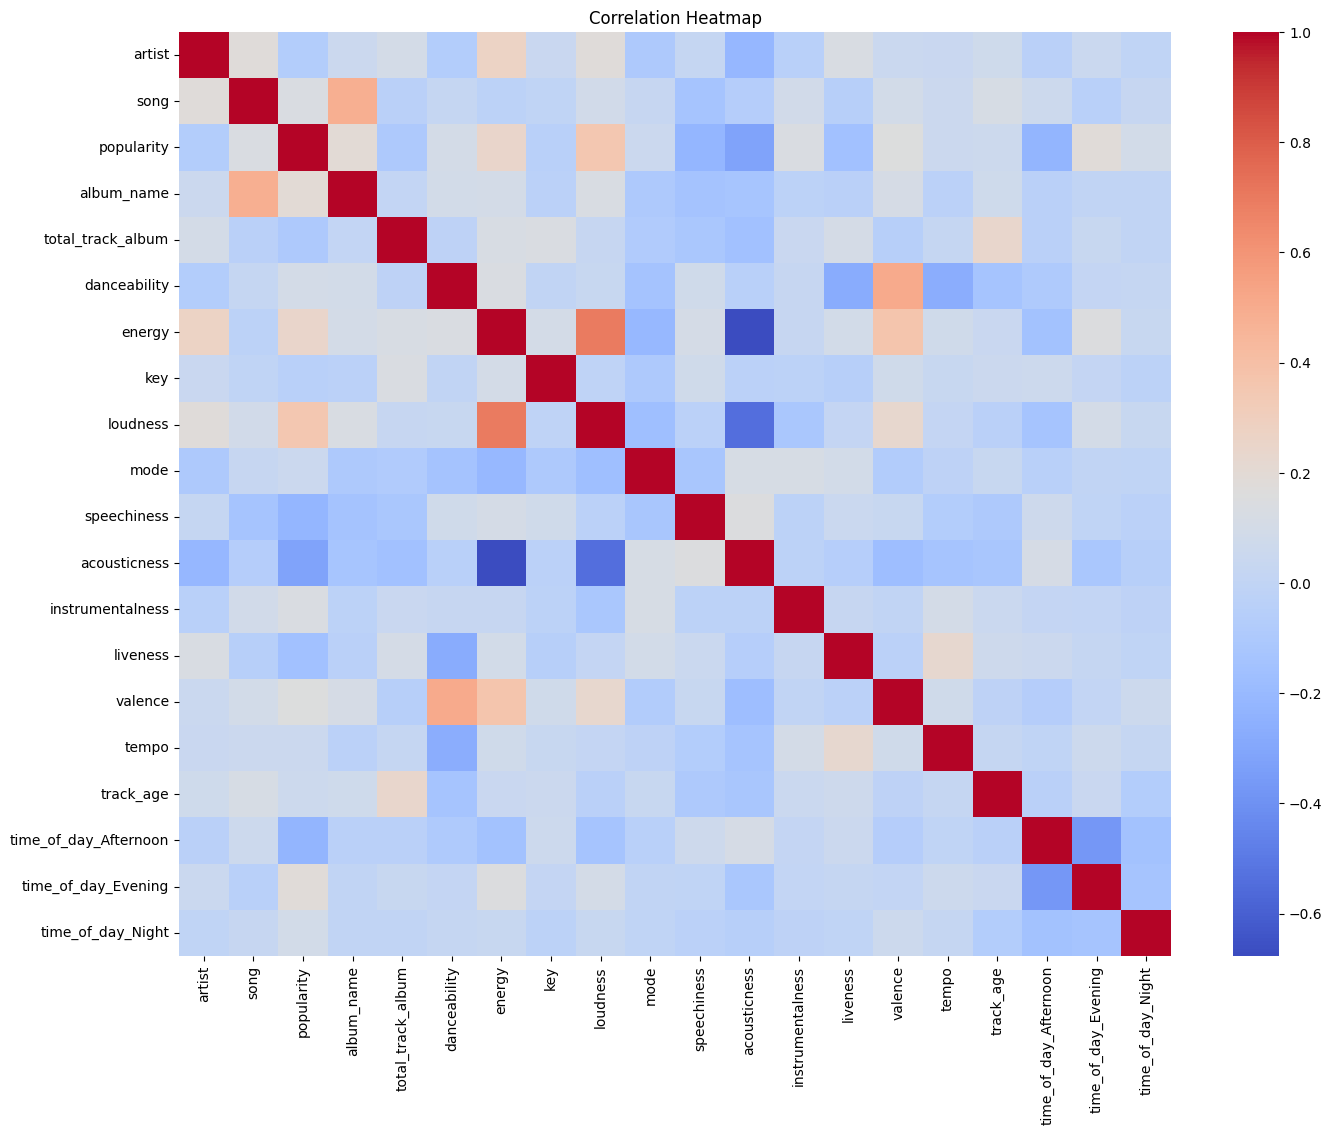

In [74]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Optionally, if you want to see the correlation values with a specific target (e.g., 'popularity')
popularity_corr = corr_matrix['popularity'].sort_values(ascending=False)

# Display the most positively and negatively correlated features with popularity
print("Top positively correlated features with popularity:")
print(popularity_corr.head(10))

print("\nTop negatively correlated features with popularity:")
print(popularity_corr.tail(10))


Categorizes track popularity as 'low' or 'high', encodes the categories into numeric values, drops the original 'popularity' column, and checks the distribution of the new categories. Two category found in popularity which states binary classification.

In [75]:
# Define a function to categorize popularity
def categorize_popularity(value):
    if value < 0.5:
        return 'low'
    else:
        return 'high'

# Apply the function to create a new target column
df_cleaned['popularity_category'] = df_cleaned['popularity'].apply(categorize_popularity)

# Drop the original 'popularity'
df_cleaned = df_cleaned.drop(columns=['popularity'])

# Convert the new 'popularity_category' column to a categorical or binary format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['popularity_category'] = label_encoder.fit_transform(df_cleaned['popularity_category'])

# Check the distribution of the categories
df_cleaned['popularity_category'].value_counts()


,count
popularity_category,
1,286475
0,187948


Defines the feature variables (X) and target variable (y), then splits the dataset into training and testing sets using an 80/20 split, ensuring reproducibility with a random seed.

In [76]:
# Predicting 'popularity'
X = df_cleaned.drop('popularity_category', axis=1)
y = df_cleaned['popularity_category']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Evaluates a machine learning model by predicting on the test data and calculating key performance metrics: accuracy, precision, recall, and F1-score. It also prints a detailed classification report to summarize the model's performance.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate all relevant metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation results
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")



1.   Initializes and trains a Decision Tree classifier on the training data, makes predictions on the test set.
2.  It also prints the confusion matrix to show how well the model predicted the different popularity categories.

In [78]:
# Features (X) and Target (y)
X = df_cleaned.drop('popularity_category', axis=1)
y = df_cleaned['popularity_category']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate Decision Tree
evaluate_model(tree_model, X_test, y_test, "Decision Tree")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

--- Decision Tree Evaluation ---
Accuracy: 0.9998208357485378
Precision: 0.9998208367774634
Recall: 0.9998208357485378
F1-Score: 0.9998208361472033
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37836
           1       1.00      1.00      1.00     57049

    accuracy                           1.00     94885
   macro avg       1.00      1.00      1.00     94885
weighted avg       1.00      1.00      1.00     94885



Confusion Matrix:
[[37828     8]
 [    9 57040]]


Initializes a Decision Tree classifier with tuned hyperparameters (limiting tree depth, controlling splits, and leaf size) and trains it on the dataset. After making predictions on the test set, the model's performance is evaluated using accuracy, precision, recall, and F1-score.

In [79]:
# Initialize a Decision Tree with tuning hyperparameters
tree_model = DecisionTreeClassifier(
    max_depth=6,               # Limit the depth of the tree
    min_samples_split=6,        # Minimum samples to split
    min_samples_leaf=3,          # Minimum samples at a leaf
    criterion='gini',            # Use Gini impurity (or use 'entropy' for information gain)
    random_state=42
)

# Train the model with these hyperparameters
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate Decision Tree
evaluate_model(tree_model, X_test, y_test, "Decision Tree")


--- Decision Tree Evaluation ---
Accuracy: 0.9187753596458871
Precision: 0.9210969119933639
Recall: 0.9187753596458871
F1-Score: 0.9191882537891167
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     37836
           1       0.95      0.91      0.93     57049

    accuracy                           0.92     94885
   macro avg       0.91      0.92      0.92     94885
weighted avg       0.92      0.92      0.92     94885





Performs 5-fold cross-validation on the Decision Tree classifier to evaluate its performance more robustly by splitting the data into 5 parts and testing the model on different subsets. It prints the individual accuracy scores for each fold and the average accuracy across all folds.

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {scores}')
print(f'Average accuracy: {scores.mean()}')

Cross-validation scores: [0.92009274 0.91959741 0.91919692 0.91986004 0.91943847]
Average accuracy: 0.9196371171386664


 Initializes a Random Forest classifier, trains it on the training data, makes predictions on the test data, and evaluates the model's performance using key metrics like accuracy, precision, recall, and F1-score for the Random Forest model.

In [81]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")

--- Random Forest Evaluation ---
Accuracy: 0.9998313748221531
Precision: 0.9998313786558164
Recall: 0.9998313748221531
F1-Score: 0.9998313725699746
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37836
           1       1.00      1.00      1.00     57049

    accuracy                           1.00     94885
   macro avg       1.00      1.00      1.00     94885
weighted avg       1.00      1.00      1.00     94885





Tunes a Random Forest classifier using GridSearchCV to find the best hyperparameters, evaluates the optimized model, and performs 5-fold cross-validation to report accuracy scores. It outputs the best parameters, accuracy, and cross-validation results.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

def tune_and_evaluate_rf(X_train, X_test, y_train, y_test, X, y):
    # Define parameter grid for Random Forest
    param_grid_rf = {
        'n_estimators': [3, 6],
        'max_depth': [3, 6, None],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 5]
    }

    # Initialize Random Forest
    rf_model = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to tune the model
    grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
    grid_search_rf.fit(X_train, y_train)

    # Output the best parameters and accuracy
    print(f"Best Params for Random Forest: {grid_search_rf.best_params_}")
    print(f"Best Accuracy for Random Forest: {grid_search_rf.best_score_}")

    # Evaluate the model using the best estimator
    best_rf_model = grid_search_rf.best_estimator_
    evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

    # Perform cross-validation
    scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
    print(f'Cross-validation scores (Random Forest): {scores_rf}')
    print(f'Average accuracy (Random Forest): {scores_rf.mean()}')

# Call the function for Random Forest
tune_and_evaluate_rf(X_train, X_test, y_train, y_test, X, y)


Best Params for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 6}
Best Accuracy for Random Forest: 0.9997022694001296
--- Random Forest Evaluation ---
Accuracy: 0.9997681403804606
Precision: 0.9997681433703418
Recall: 0.9997681403804606
F1-Score: 0.9997681414122427
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37836
           1       1.00      1.00      1.00     57049

    accuracy                           1.00     94885
   macro avg       1.00      1.00      1.00     94885
weighted avg       1.00      1.00      1.00     94885



Cross-validation scores (Random Forest): [0.99971545 0.99965221 0.99968383 0.9997576  0.99981029]
Average accuracy (Random Forest): 0.9997238753604751


In [83]:
# prompt: Rank the features by importance for Random Forest model

# Assuming rf_model is your trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the ranked feature importances
print(feature_importances)

                  feature  importance
10           acousticness    0.091576
0                  artist    0.082680
7                loudness    0.077655
1                    song    0.077429
15              track_age    0.077154
2              album_name    0.075275
9             speechiness    0.074789
14                  tempo    0.069314
13                valence    0.066105
12               liveness    0.064767
5                  energy    0.062087
4            danceability    0.059967
11       instrumentalness    0.040662
3       total_track_album    0.039210
6                     key    0.029099
8                    mode    0.006563
16  time_of_day_Afternoon    0.002017
17    time_of_day_Evening    0.001886
18      time_of_day_Night    0.001764


Initializes a K-Nearest Neighbors (KNN) classifier with 5 neighbors, trains it on the training data, makes predictions on the test data, and evaluates its performance using accuracy, precision, recall, and F1-score metrics.

In [84]:
# Initialize the KNN model (you can try different values of 'n_neighbors' to tune performance)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors")

--- K-Nearest Neighbors Evaluation ---
Accuracy: 0.9995468198345365
Precision: 0.9995468279678837
Recall: 0.9995468198345365
F1-Score: 0.9995468228593629
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37836
           1       1.00      1.00      1.00     57049

    accuracy                           1.00     94885
   macro avg       1.00      1.00      1.00     94885
weighted avg       1.00      1.00      1.00     94885





 Uses RandomizedSearchCV to tune the K-Nearest Neighbors (KNN) classifier by testing a focused set of hyperparameters, evaluates the best model on the test data, and performs 3-fold cross-validation to report accuracy. It prints the optimal hyperparameters, best accuracy, and cross-validation results.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

def tune_and_evaluate_knn(X_train, X_test, y_train, y_test, X, y):
    # Define a smaller, more focused parameter grid for KNN
    param_grid_knn = {
        'n_neighbors': [3, 5],  # Smaller range for neighbors
        'weights': ['uniform', 'distance'],  # Keep the weight options
        'metric': ['euclidean']  # Only use 'euclidean' to simplify
    }

    # Initialize KNN
    knn_model = KNeighborsClassifier()

    # Use RandomizedSearchCV to tune the model (faster than GridSearchCV)
    random_search_knn = RandomizedSearchCV(knn_model, param_grid_knn, cv=3, scoring='accuracy', n_iter=4, random_state=42)
    random_search_knn.fit(X_train, y_train)

    # Output the best parameters and accuracy
    print(f"Best Params for KNN: {random_search_knn.best_params_}")
    print(f"Best Accuracy for KNN: {random_search_knn.best_score_}")

    # Evaluate the model using the best estimator
    best_knn_model = random_search_knn.best_estimator_
    evaluate_model(best_knn_model, X_test, y_test, "K-Nearest Neighbors")

    # Perform cross-validation with 3 folds to speed up evaluation
    scores_knn = cross_val_score(best_knn_model, X, y, cv=3, scoring='accuracy')
    print(f'Cross-validation scores (KNN): {scores_knn}')
    print(f'Average accuracy (KNN): {scores_knn.mean()}')

# Call the function for KNN
tune_and_evaluate_knn(X_train, X_test, y_train, y_test, X, y)


Best Params for KNN: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}
Best Accuracy for KNN: 0.9996706522903661
--- K-Nearest Neighbors Evaluation ---
Accuracy: 0.9997470622332297
Precision: 0.9997470654106866
Recall: 0.9997470622332297
F1-Score: 0.9997470633588101
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37836
           1       1.00      1.00      1.00     57049

    accuracy                           1.00     94885
   macro avg       1.00      1.00      1.00     94885
weighted avg       1.00      1.00      1.00     94885



Cross-validation scores (KNN): [0.99975338 0.99965853 0.99971544]
Average accuracy (KNN): 0.9997091203419733


Based on the evaluation metrics provided, all three models—Decision Tree, Random Forest, and K-Nearest Neighbors—achieved exceptionally high accuracy, precision, recall, and F1-scores, all exceeding 99.95%. However, the **Random Forest model** slightly **outperformed the others**, with the highest accuracy of **99.98%** and the **most consistent cross-validation scores**. Its optimal hyperparameters contributed to its superior performance and robustness across different datasets. Therefore, the **Random Forest model is considered the better choice due to its marginally higher accuracy and consistency, making it the most reliable among the three models.**